In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import torch
import os

import sys
sys.path.insert(0, '../trainingdata')
from datasaver import *
sys.path.insert(0, '../testproblems/tdarcy')
from manufacturedsolutions import *
sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from NeuralOperator import NeuralOperator
from customlosses import *
from quadrature import *
from customlayers import discretize_functions
from basisfunctions import *

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from NeuralOperator import NeuralOperator

logdir = '../../../nnlogs'
device = 'cuda:3'

sublogdir = 'massconservation'

projection = loadmodelfromlabel(model=NeuralOperator, label='modelNGO_4x10x10', logdir=logdir, sublogdir=sublogdir, device=device)
projection.hparams['modeltype'] = 'FEM'
projection.hparams['discretization_device'] = 'cuda:3'
projection.hparams['n_timesteps'] = 3
projection.hparams['Dt'] = 1/3
projection.hparams['output_coefficients'] = True
projection.__init__(projection.hparams)

model = projection

In [5]:
model.hparams['Q']

(33, 99, 99)

In [6]:
model.hparams['n_elements']

(1, 3, 3)

In [7]:
model.compute_quadrature()

array([1, 0, 0])

In [8]:
model.xi_OmegaT

array([[1.28765288e-03, 4.29217626e-04, 4.29217626e-04],
       [1.28765288e-03, 4.29217626e-04, 2.25737896e-03],
       [1.28765288e-03, 4.29217626e-04, 5.52951505e-03],
       ...,
       [9.98712347e-01, 9.99570782e-01, 9.94470485e-01],
       [9.98712347e-01, 9.99570782e-01, 9.97742621e-01],
       [9.98712347e-01, 9.99570782e-01, 9.99570782e-01]])

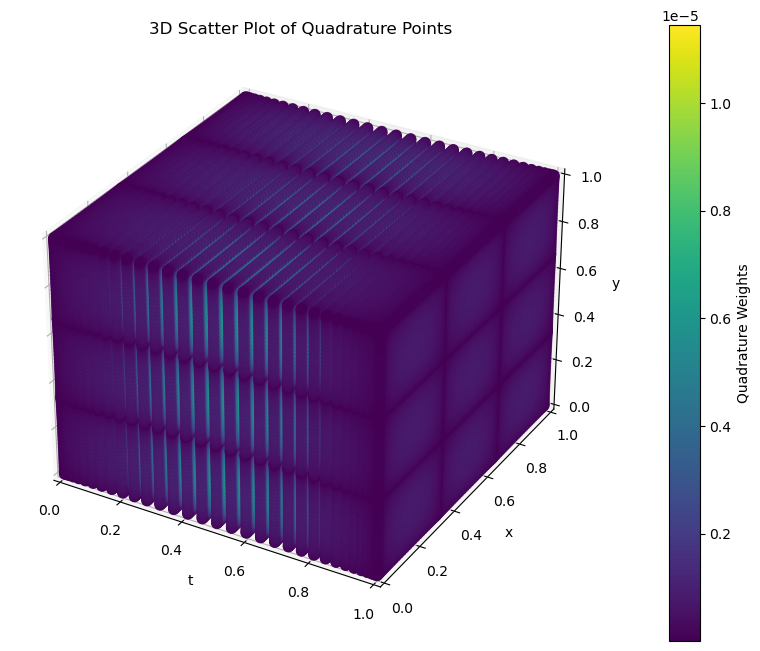

In [125]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sc = ax.scatter(model.xi_OmegaT[:, 0], model.xi_OmegaT[:, 1], model.xi_OmegaT[:, 2], 
            c=model.w_OmegaT, cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Quadrature Points')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

In [126]:
model.rescale_quadrature_t()

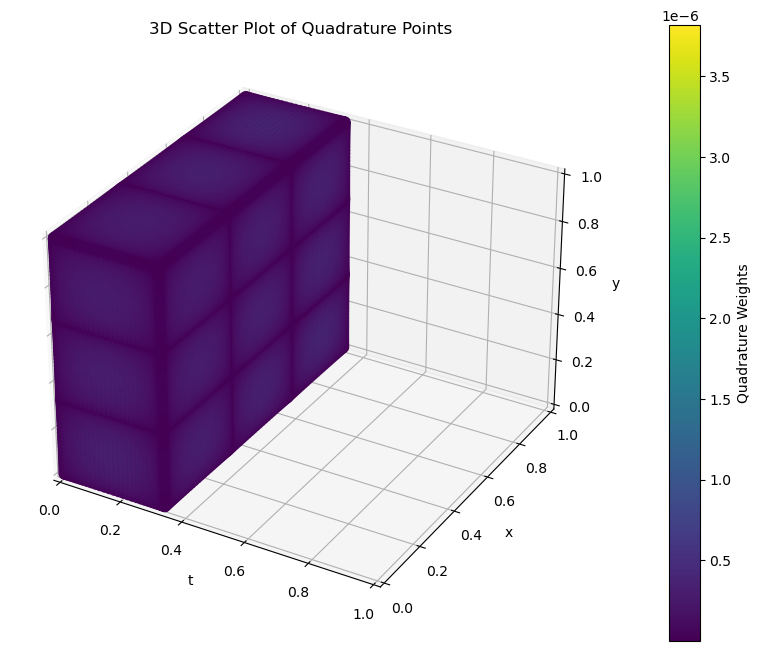

In [127]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sc = ax.scatter(model.xi_OmegaT[:, 0], model.xi_OmegaT[:, 1], model.xi_OmegaT[:, 2], 
            c=model.w_OmegaT, cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Quadrature Points')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

In [128]:
model.translate_quadrature_t()

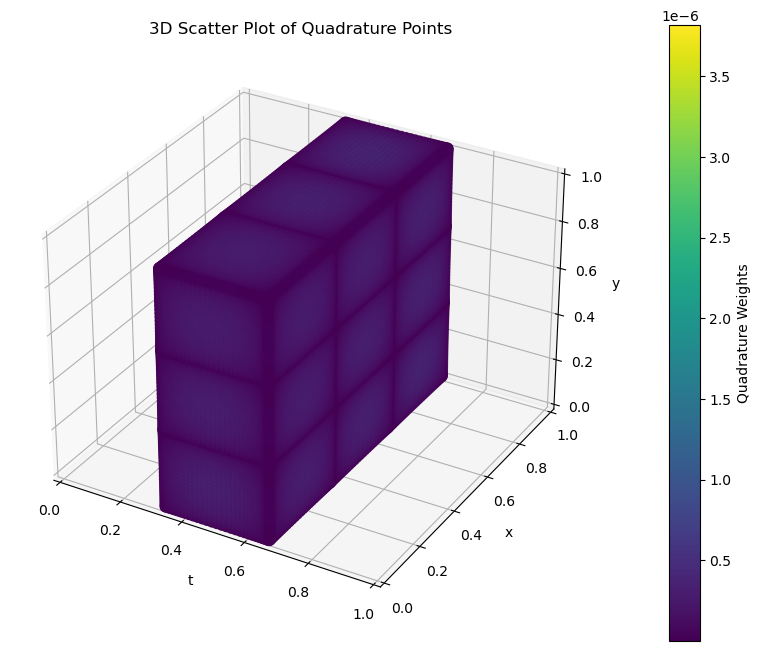

In [129]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sc = ax.scatter(model.xi_OmegaT[:, 0], model.xi_OmegaT[:, 1], model.xi_OmegaT[:, 2], 
            c=model.w_OmegaT, cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Quadrature Points')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

In [130]:
model.translate_quadrature_t()

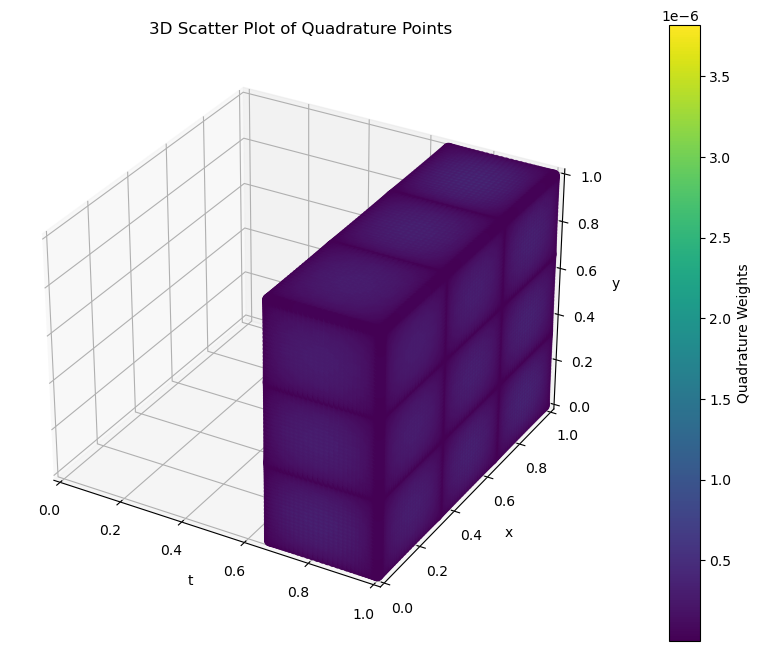

In [131]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sc = ax.scatter(model.xi_OmegaT[:, 0], model.xi_OmegaT[:, 1], model.xi_OmegaT[:, 2], 
            c=model.w_OmegaT, cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Quadrature Points')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

In [132]:
model.compute_quadrature()

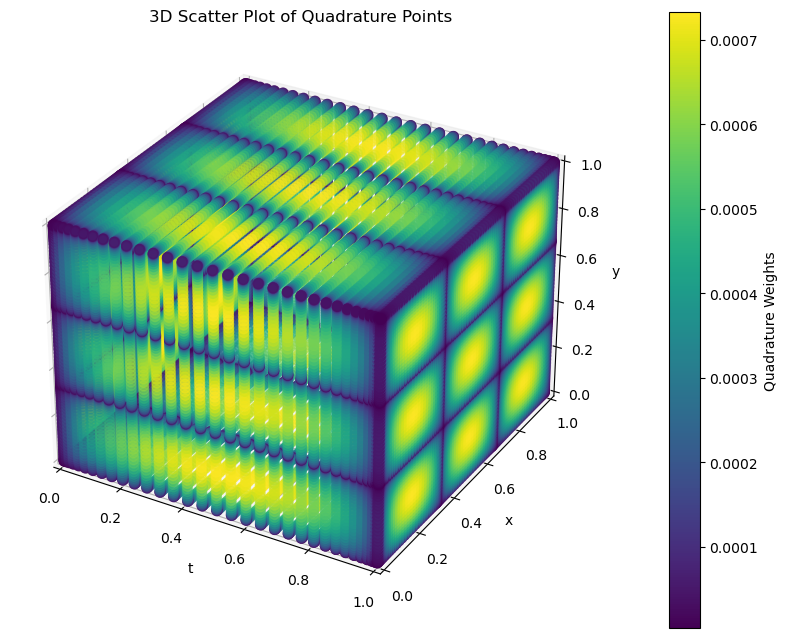

In [133]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sct = ax.scatter(model.xi_Gamma_t0[:, 0], model.xi_Gamma_t0[:, 1], model.xi_Gamma_t0[:, 2], 
            c=model.w_Gamma_t0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_tT[:, 0], model.xi_Gamma_tT[:, 1], model.xi_Gamma_tT[:, 2], 
            c=model.w_Gamma_tT, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_x0[:, 0], model.xi_Gamma_x0[:, 1], model.xi_Gamma_x0[:, 2], 
            c=model.w_Gamma_x0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_xL[:, 0], model.xi_Gamma_xL[:, 1], model.xi_Gamma_xL[:, 2], 
            c=model.w_Gamma_xL, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_y0[:, 0], model.xi_Gamma_y0[:, 1], model.xi_Gamma_y0[:, 2], 
            c=model.w_Gamma_y0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_yL[:, 0], model.xi_Gamma_yL[:, 1], model.xi_Gamma_yL[:, 2], 
            c=model.w_Gamma_yL, cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Quadrature Points')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

In [134]:
model.rescale_quadrature_t()

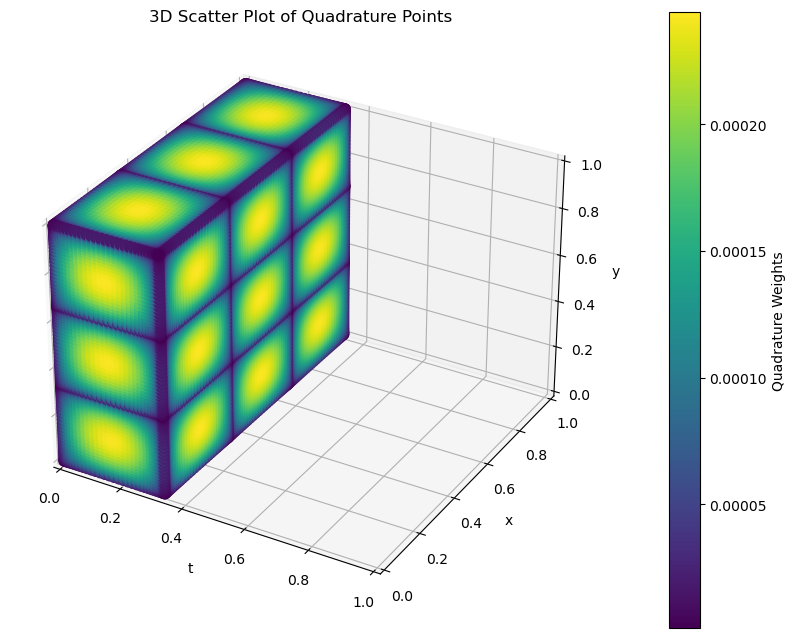

In [136]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sct = ax.scatter(model.xi_Gamma_t0[:, 0], model.xi_Gamma_t0[:, 1], model.xi_Gamma_t0[:, 2], 
            c=model.w_Gamma_t0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_tT[:, 0], model.xi_Gamma_tT[:, 1], model.xi_Gamma_tT[:, 2], 
            c=model.w_Gamma_tT, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_x0[:, 0], model.xi_Gamma_x0[:, 1], model.xi_Gamma_x0[:, 2], 
            c=model.w_Gamma_x0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_xL[:, 0], model.xi_Gamma_xL[:, 1], model.xi_Gamma_xL[:, 2], 
            c=model.w_Gamma_xL, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_y0[:, 0], model.xi_Gamma_y0[:, 1], model.xi_Gamma_y0[:, 2], 
            c=model.w_Gamma_y0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_yL[:, 0], model.xi_Gamma_yL[:, 1], model.xi_Gamma_yL[:, 2], 
            c=model.w_Gamma_yL, cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Quadrature Points')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

In [142]:
model.translate_quadrature_t()

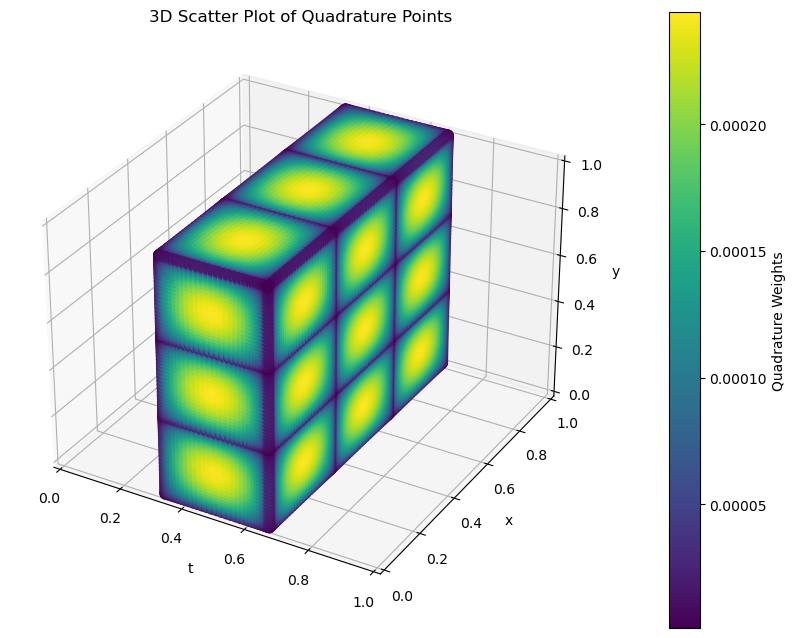

In [139]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sc = ax.scatter(model.xi_Gamma_t0[:, 0], model.xi_Gamma_t0[:, 1], model.xi_Gamma_t0[:, 2], 
            c=model.w_Gamma_t0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_tT[:, 0], model.xi_Gamma_tT[:, 1], model.xi_Gamma_tT[:, 2], 
            c=model.w_Gamma_tT, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_x0[:, 0], model.xi_Gamma_x0[:, 1], model.xi_Gamma_x0[:, 2], 
            c=model.w_Gamma_x0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_xL[:, 0], model.xi_Gamma_xL[:, 1], model.xi_Gamma_xL[:, 2], 
            c=model.w_Gamma_xL, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_y0[:, 0], model.xi_Gamma_y0[:, 1], model.xi_Gamma_y0[:, 2], 
            c=model.w_Gamma_y0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_yL[:, 0], model.xi_Gamma_yL[:, 1], model.xi_Gamma_yL[:, 2], 
            c=model.w_Gamma_yL, cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Quadrature Points')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

In [140]:
model.translate_quadrature_t()

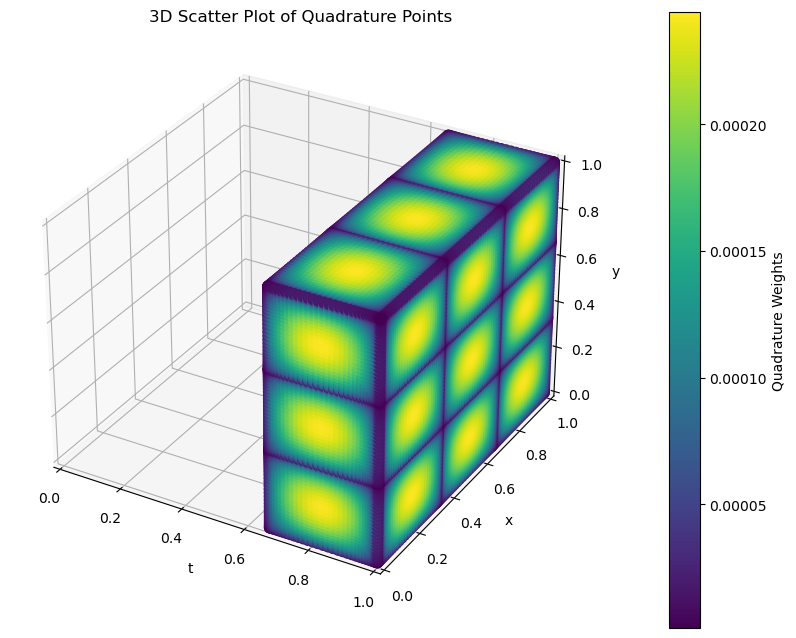

In [141]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sc = ax.scatter(model.xi_Gamma_t0[:, 0], model.xi_Gamma_t0[:, 1], model.xi_Gamma_t0[:, 2], 
            c=model.w_Gamma_t0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_tT[:, 0], model.xi_Gamma_tT[:, 1], model.xi_Gamma_tT[:, 2], 
            c=model.w_Gamma_tT, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_x0[:, 0], model.xi_Gamma_x0[:, 1], model.xi_Gamma_x0[:, 2], 
            c=model.w_Gamma_x0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_xL[:, 0], model.xi_Gamma_xL[:, 1], model.xi_Gamma_xL[:, 2], 
            c=model.w_Gamma_xL, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_y0[:, 0], model.xi_Gamma_y0[:, 1], model.xi_Gamma_y0[:, 2], 
            c=model.w_Gamma_y0, cmap='viridis', s=50)
sc = ax.scatter(model.xi_Gamma_yL[:, 0], model.xi_Gamma_yL[:, 1], model.xi_Gamma_yL[:, 2], 
            c=model.w_Gamma_yL, cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Quadrature Points')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

# plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()